In [1]:
import pandas as pd
import numpy as np

In [2]:
bee = pd.read_csv('drinks.csv')

In [3]:
bee.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
bee.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'population', 'continent'],
      dtype='object')

In [5]:
bee.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent
0,Afghanistan,0,0,0,0.0,34.660.000,Asia
1,Albania,89,132,54,4.9,2.876.000,Europe
2,Algeria,25,0,14,0.7,40.061.000,Africa
3,Andorra,245,138,312,12.4,77.281.000,Europe
4,Angola,217,57,45,5.9,28.081.000,Africa


In [10]:
def consumo_vinho (a):
    if a <= 100:
        return 'baixo'
    elif a >= 101:
        return 'alto'
    else: 
        return 'Moderado'
    

In [11]:
bee['consumo_vinho'] = bee['wine_servings'].apply(consumo_vinho)

In [13]:
bee.head(50)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,continent,consumo,consumo_vinho
0,Afghanistan,0,0,0,0.0,34.660.000,Asia,baixo,baixo
1,Albania,89,132,54,4.9,2.876.000,Europe,baixo,baixo
2,Algeria,25,0,14,0.7,40.061.000,Africa,baixo,baixo
3,Andorra,245,138,312,12.4,77.281.000,Europe,alto,alto
4,Angola,217,57,45,5.9,28.081.000,Africa,baixo,baixo
5,Antigua & Barbuda,102,128,45,4.9,86.295,North America,baixo,baixo
6,Argentina,193,25,221,8.3,43.085.000,South America,alto,alto
7,Armenia,21,179,11,3.8,2.925.000,Europe,baixo,baixo
8,Australia,261,72,212,10.4,24.013.000,Oceania,alto,alto
9,Austria,279,75,191,9.7,8.725.111,Europe,alto,alto


In [14]:
total = bee.size()
total.sort_values(ascending = False)
total

TypeError: 'numpy.int32' object is not callable

In [15]:
bee_3 = bee.set_index('consumo')

In [16]:
# Agora vou aplicar o groupBY
bee_3 = bee_3.groupby(level = 'consumo')

In [17]:
bee_3

In [18]:
bee_3.sum()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
consumo,,,,
alto,7144,3630,7125,327.4
baixo,13345,12002,2419,583.0


In [19]:
bee_4 = bee.set_index(['consumo','continent'])

In [21]:
bee_4.head()

country  beer_servings  spirit_servings  wine_servings  \
consumo continent                                                               
baixo   Asia       Afghanistan              0                0              0   
        Europe         Albania             89              132             54   
        Africa         Algeria             25                0             14   
alto    Europe         Andorra            245              138            312   
baixo   Africa          Angola            217               57             45   

                   total_litres_of_pure_alcohol  population consumo_vinho  
consumo continent                                                          
baixo   Asia                                0.0  34.660.000         baixo  
        Europe                              4.9   2.876.000         baixo  
        Africa                              0.7  40.061.000         baixo  
alto    Europe                             12.4  77.281.000          alto  
baixo   Africa                              5.9  28.081.000         baixo

REALIZANDO A MESMA OPERAÇÃO COM NUMPY

In [23]:
bee_4.aggregate(np.sum)


country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
population                      34.660.0002.876.00040.061.00077.281.00028.081....
consumo_vinho                   baixobaixobaixoaltobaixobaixoaltobaixoaltoalto...
dtype: object

In [26]:
#bee_4.aggregate([np.sum, np.mean, np.size])

AGRUPANDO POR MAIS INDICES

In [28]:
bee_5 = bee.set_index(['continent','consumo'])

In [29]:
bee_5 = bee_5.groupby(level=['continent','consumo'])

In [31]:
bee_5.head(10)

,,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,population,consumo_vinho
continent,consumo,,,,,,,
Asia,baixo,Afghanistan,0,0,0,0.0,34.660.000,baixo
Europe,baixo,Albania,89,132,54,4.9,2.876.000,baixo
Africa,baixo,Algeria,25,0,14,0.7,40.061.000,baixo
Europe,alto,Andorra,245,138,312,12.4,77.281.000,alto
Africa,baixo,Angola,217,57,45,5.9,28.081.000,baixo
North America,baixo,Antigua & Barbuda,102,128,45,4.9,86.295,baixo
South America,alto,Argentina,193,25,221,8.3,43.085.000,alto
Europe,baixo,Armenia,21,179,11,3.8,2.925.000,baixo
Oceania,alto,Australia,261,72,212,10.4,24.013.000,alto


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

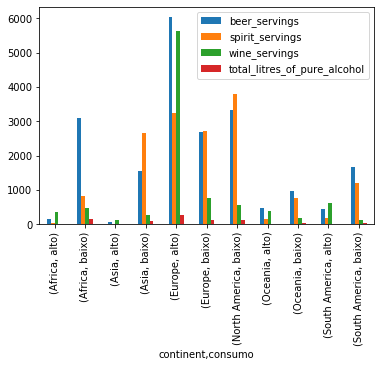

In [36]:
bee_5.sum().plot.bar()

In [39]:
#bee_5["continent"].value_counts().plot.barh()

DEIXANDO APENAS A COLUNA PAIS (CATEGORICA)

In [40]:
bee.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'population', 'continent', 'consumo',
       'consumo_vinho'],
      dtype='object')

In [42]:
bee_6 = bee.set_index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'population', 'continent', 'consumo',
       'consumo_vinho'])

In [44]:
bee_6.columns

Index([], dtype='object')

In [45]:
bee_6 = bee_6.groupby(level = ['consumo','continent'])

In [46]:
bee_6.count()

Empty DataFrame
Columns: []
Index: [(alto, Africa), (alto, Asia), (alto, Europe), (alto, Oceania), (alto, South America), (baixo, Africa), (baixo, Asia), (baixo, Europe), (baixo, North America), (baixo, Oceania), (baixo, South America)]

In [47]:
bee_6.sum()

Empty DataFrame
Columns: []
Index: [(alto, Africa), (alto, Asia), (alto, Europe), (alto, Oceania), (alto, South America), (baixo, Africa), (baixo, Asia), (baixo, Europe), (baixo, North America), (baixo, Oceania), (baixo, South America)]